# 描述性统计 Statistical Summary

* 这项工作主要是让我们知道数据的整体状况怎么样，描述这个数据的“样子”。
* 数据处理的最关键，也是最重要的第一步
* 了解数据的概况，有助于后续的数据分析和挖掘

**描述性统计的Python工具**
> PANDAS

> NumPy和SciPy
* count 统计非NA的数量
* describe 针对series或者DF的列计算汇总统计
* min max 最小值和最大值
* quantile 样本分位数
* sum 求和
* mean 均值
* median 中位数
* mad 根据均值计算平均绝对离差
* var 方差
* std 标准差
* skew 偏度（三阶矩）
* kurt 峰度
* cumsum 累计和
* cumprod 累计乘积
* diff 一阶差分
* pct_change 计算百分数变化
* mode 计算众数
* cov 协方差
* corrcoef 相关系数

In [1]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates

from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [69]:
data = pd.read_csv('datasets/000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'], ascending=True)

,Preclose,Open,Highest,Lowest,Close
Day,,,,,
1990-12-19,,96.050,99.980,95.790,99.980
1990-12-20,99.98,104.300,104.390,99.980,104.390
1990-12-21,104.39,109.070,109.130,103.730,109.130
1990-12-24,109.13,113.570,114.550,109.130,114.550
1990-12-25,114.55,120.090,120.250,114.550,120.250
...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350


In [3]:
data_new = data['1995-01':'2025-08'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
# 计算000001上证指数日收益率 两种：
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Raw_return
Day,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,-0.023035
...,...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562,0.015109
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382,-0.003909
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350,-0.017587


In [4]:
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: (1+x).prod()-1).to_frame(name = 'Ret')
Month_data

,Ret
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2025-04-30,-0.017002
2025-05-31,0.020877
2025-06-30,0.028959


In [5]:
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name = 'Ret')
Month_data.index.name = 'month'
Month_data

,Ret
month,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2025-04-30,-0.017002
2025-05-31,0.020877
2025-06-30,0.028959


In [6]:
Quarter_data = data_new.resample('QE')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name = 'Ret')
Quarter_data.index.name = 'Q'
Quarter_data

,Ret
Q,
1995-03-31,-0.001466
1995-06-30,-0.025258
1995-09-30,0.145660
1995-12-31,-0.231358
1996-03-31,0.001981
...,...
2024-09-30,0.124383
2024-12-31,0.004575
2025-03-31,-0.004779


In [7]:
Year_data = data_new.resample('YE')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name = 'Ret')
Year_data.index.name = 'Y'
Year_data

,Ret
Y,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


# 收益率常见的描述性统计指标

 在金融市场中，我们常用描述性统计指标来快速刻画收益率序列的分布特征，并可用数学公式进行精确定义：
 - **样本数（Count）**：表明可用观测值的多少，样本越充分统计结果越稳健。
   - 公式：$n = \text{len}(r_1, r_2, ..., r_n)$
 - **均值（Mean）**：衡量收益率的中心位置。
   - 公式：$\mu = \frac{1}{n} \sum_{i=1}^n r_i$
 - **中位数（Median）**：将所有收益率从小到大排列后处于中间的值。
 - **标准差（Standard Deviation）**：刻画收益波动的强弱，是风险度量的基础。
   - 公式：$\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (r_i - \mu)^2}$
 - **方差（Variance）**：标准差的平方，反映波动的离散程度。
   - 公式：$s^2 = \frac{1}{n-1} \sum_{i=1}^n (r_i - \mu)^2$
 - **分位数（Quantiles）**：如25%、50%、75%分位数，可帮助我们了解收益率在不同位置的取值及尾部风险。
   - 公式：$q_p = \text{第} \lceil np \rceil \text{小的数}$，$p$为分位点（如0.25, 0.5, 0.75）
 - **最小值与最大值（Min/Max）**：展示历史上出现过的极端收益。
   - 公式：$\min(r_1, ..., r_n)$，$\max(r_1, ..., r_n)$
 - **正收益比例（% Positive）**：统计收益率为正的比例，直观反映赚钱的频率。
   - 公式：$\text{正收益比例} = \frac{1}{n} \sum_{i=1}^n I(r_i > 0)$，其中$I(\cdot)$为指示函数
 - **偏度（Skewness）**：描述分布的不对称性，判断分布是否偏斜。
   - 公式：$\text{Skewness} = \frac{1}{n} \sum_{i=1}^n \left(\frac{r_i - \mu}{\sigma}\right)^3$
 - **峰度（Kurtosis）**：描述分布的尖峭程度，判断是否存在肥尾或极端事件风险。
   - 公式：$\text{Kurtosis} = \frac{1}{n} \sum_{i=1}^n \left(\frac{r_i - \mu}{\sigma}\right)^4$
 
这些指标结合使用，就能为后续的风险控制、资产配置和策略研究提供扎实的“背景信息”。 -->

In [8]:
# 汇总日/月/年收益率的描述性统计指标
def summarize_returns(series):
    clean_series = series.dropna()
    return pd.Series({
        '样本数': clean_series.count(),
        '均值': clean_series.mean(),
        '中位数': clean_series.median(),
        '标准差': clean_series.std(),
        '方差': clean_series.var(),
        '最小值': clean_series.min(),
        '25%分位数': clean_series.quantile(0.25),
        '50%分位数': clean_series.quantile(0.5),
        '75%分位数': clean_series.quantile(0.75),
        '最大值': clean_series.max(),
        '正收益比例': (clean_series > 0).mean(),
        '偏度': clean_series.skew(),
        '峰度': clean_series.kurt()
    })

return_periods = {
    '日收益率': data_new.loc['2000-01':'2025-08', 'Raw_return'],
    '月收益率': Month_data.loc['2000-01':'2025-08', 'Ret'],
    '年收益率': Year_data.loc['2000':'2025', 'Ret']
}

returns_summary = pd.DataFrame({
    name: summarize_returns(series) for name, series in return_periods.items()
}).T
returns_summary['正收益比例'] = returns_summary['正收益比例'].mul(100)
returns_summary.rename(columns={'正收益比例': '正收益比例(%)'}, inplace=True)
returns_summary = returns_summary.round({
    '样本数': 0,
    '均值': 5,
    '中位数': 5,
    '标准差': 5,
    '方差': 7,
    '最小值': 5,
    '25%分位数': 5,
    '50%分位数': 5,
    '75%分位数': 5,
    '最大值': 5,
    '正收益比例(%)': 2,
    '偏度': 3,
    '峰度': 3
})
returns_summary['样本数'] = returns_summary['样本数'].astype(int)
returns_summary

,样本数,均值,中位数,标准差,方差,最小值,25%分位数,50%分位数,75%分位数,最大值,正收益比例(%),偏度,峰度
日收益率,6219,0.00027,0.00051,0.01462,0.000214,-0.08841,-0.00615,0.00051,0.00700,0.09857,52.68,-0.212,5.631
月收益率,308,0.00582,0.00457,0.06979,0.004870,-0.24631,-0.03590,0.00457,0.04199,0.27446,54.22,-0.055,1.991
年收益率,26,0.10927,0.03985,0.41714,0.174006,-0.65394,-0.14922,0.03985,0.14793,1.30433,53.85,1.284,2.094


## 均值 mean

算数平均：
$$A_n=\frac{a_1+a_2+a_3+\cdots+a_n}{n}$$

In [45]:
round(data_new['2000-01':'2025-08']['Raw_return'].mean(),5)

np.float64(0.00027)

In [48]:
#注意以下代码的书写逻辑，和上面的代码不同
np.mean(data_new['2000-01':'2025-08']['Raw_return'])

np.float64(0.0002740673718891408)

In [50]:
print('中国股票市场日度平均收益率为',data_new['2000-01':'2025-08']['Raw_return'].mean().round(5)*100,'%',sep="")

中国股票市场日度平均收益率为0.027%


In [52]:
print('中国股票市场月度平均收益率为',Month_data['2000-01':'2025-08']['Ret'].mean().round(4)*100,'%',sep="")

中国股票市场月度平均收益率为0.58%


In [54]:
print('中国股票市场年度平均收益率为',Year_data['2000':'2025']['Ret'].mean().round(4)*100,'%',sep="")

中国股票市场年度平均收益率为10.93%


In [14]:
sum(data_new['2000-01':'2024-09']['Raw_return']) / len(data_new['2000-01':'2024-09']['Raw_return'])

0.0002576419497498928

In [55]:
data_new['1995-01':'2025-08']['Raw_return'].describe()

count    7445.000000
mean        0.000372
std         0.016331
min        -0.163937
25%        -0.006607
50%         0.000496
75%         0.007503
max         0.309870
Name: Raw_return, dtype: float64

# 分位数 quantile

分位数（Quantile），亦称分位点，是指将一个随机变量的概率分布范围分为几个等份的数值点，常用的有中位数（即二分位数）、四分位数、百分位数等。

举例说明，我们班上有10名同学，他们的期末成绩是

【20，24，38，34，43，56，76，86，98，100】

如果期末考试要让40%的不通过，60%的人通过，分数线是多少呢？

常见的分类方法：

- 中位数 Median
  - 当N是奇数时
    - $$m_{0.5}=X_{(N+1) / 2}$$
  - 当N是偶数时
    - $$m_{0.5}=\frac{X_{(N / 2)}+X_{(N / 2+1)}}{2}$$
- 四分位数 Quartile
- 10分位数 常用在股票投资策略中

Some q-quantiles have special names:

- The only 2-quantile is called the median
- The 3-quantiles are called tertiles or terciles 
- The 4-quantiles are called quartiles 
- The 5-quantiles are called quintiles 
- The 6-quantiles are called sextiles 
- The 7-quantiles are called septiles
- The 8-quantiles are called octiles
- The 10-quantiles are called deciles
- The 12-quantiles are called duo-deciles or dodeciles
- The 16-quantiles are called hexadeciles
- The 20-quantiles are called ventiles, vigintiles, or demi-deciles 
- The 100-quantiles are called percentiles

In [16]:
len(data_new['1995-01':'2024-09'])

7223

In [17]:
len(data_new[data_new["Raw_return"] > 0])

3903

In [18]:
len(data_new[data_new["Raw_return"] > 0])/len(data_new)

0.5242444593687038

In [57]:
from statistics import quantiles

# quantiles函数里面的参数需要注意
# 计算data_new在1995-01到2025-08期间Raw_return的十分位数
# n=10 表示分成10份（十分位数），method='exclusive' 表示使用不包含端点的分位数计算方法
quantiles(data_new['1995-01':'2025-08']['Raw_return'], n = 10, method='exclusive')

[-0.016149825200764644,
 -0.008725465267893506,
 -0.004824058860378355,
 -0.001823562879049323,
 0.000496269119653947,
 0.0028404410444615724,
 0.005705730958616373,
 0.009680619902095611,
 0.016938708022350025]

In [20]:
quantiles(data_new['1995-01':'2024-09']['Raw_return'], n = 10, method='inclusive') # 在金融里，比如构造分位数组合（5分位、10分位），常用的还是 inclusive（更贴近排序分组）

[-0.016273486796843283,
 -0.008904480681335824,
 -0.0049105335359804995,
 -0.0019112410821794379,
 0.0004683483640481878,
 0.0028484509548271308,
 0.005764948233341815,
 0.009789313259894784,
 0.017182938215153553]

In [58]:
quantiles(Month_data['1995-01':'2025-08']['Ret'], n = 10, method='exclusive')

[-0.07275859939933171,
 -0.04791044569180978,
 -0.026743591620732254,
 -0.007438510711914969,
 0.004471851221674816,
 0.020382622493721046,
 0.03630346419175008,
 0.05424194628329713,
 0.10003790772865565]

In [21]:
import statistics
help(statistics.quantiles)

Help on function quantiles in module statistics:

quantiles(data, *, n=4, method='exclusive')
    Divide *data* into *n* continuous intervals with equal probability.

    Returns a list of (n - 1) cut points separating the intervals.

    Set *n* to 4 for quartiles (the default).  Set *n* to 10 for deciles.
    Set *n* to 100 for percentiles which gives the 99 cuts points that
    separate *data* in to 100 equal sized groups.

    The *data* can be any iterable containing sample.
    The cut points are linearly interpolated between data points.

    If *method* is set to *inclusive*, *data* is treated as population
    data.  The minimum value is treated as the 0th percentile and the
    maximum value is treated as the 100th percentile.



In [22]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
q = statistics.quantiles(data, n=4, method='exclusive')
print(q)

[2.75, 5.5, 8.25]


In [23]:
q = statistics.quantiles(data, n=4, method='inclusive')
print(q)

[3.25, 5.5, 7.75]


In [24]:
Month_data['2000-01':'2025-08']['Ret'].describe()

count    308.000000
mean       0.005821
std        0.069785
min       -0.246314
25%       -0.035898
50%        0.004569
75%        0.041993
max        0.274464
Name: Ret, dtype: float64

In [25]:
statistics.quantiles(Month_data['Ret'], n = 10, method='inclusive')

[-0.0709964521333589,
 -0.047737015530115404,
 -0.026630590375295526,
 -0.007411841595713531,
 0.004471851221674816,
 0.020217863557133686,
 0.03625761917881416,
 0.05352850908377551,
 0.09697370519393292]

In [59]:
len(Month_data['1995-01':'2025-08'][Month_data["Ret"] > 0])/len(Month_data['1995-01':'2025-08'])

0.532608695652174

In [27]:
quantiles(Month_data['2000-01':'2025-08']['Ret'], n = 10, method='exclusive')

[-0.06407330856971007,
 -0.04690477004328284,
 -0.02294678764968542,
 -0.006030700018074264,
 0.004568893904690174,
 0.018850177397894186,
 0.03537258283387652,
 0.05187838634791797,
 0.08409364977091105]

In [28]:
seq = np.linspace(0,1,11)
seq

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [29]:
np.quantile(data_new['2000-01':'2024-09']['Raw_return'],q=seq)

array([-0.08840689, -0.01536682, -0.00833553, -0.00468863, -0.00176721,
        0.00049848,  0.00268087,  0.00538043,  0.00914657,  0.01601642,
        0.09856839])

# 波动率 Variance

$$\sigma^2=\frac{\sum(X-\mu)^2}{N}$$

$$ R_{t+1} = a + b * VAR_t $$

In [30]:
np.var(data_new['2000-01':'2025-08']['Raw_return'])

0.0002137799963357011

In [60]:
m = np.mean(data_new['2000-01':'2025-08']['Raw_return'])
sum((data_new['2000-01':'2025-08']['Raw_return'] - m)**2) / (len(data_new['2000-01':'2025-08']['Raw_return'])-1)

0.00021381437716496018

In [32]:
np.std(data_new['2000-01':'2025-08']['Raw_return'])

0.01462121733426123

In [33]:
np.sqrt(np.var(data_new['2000-01':'2025-08']['Raw_return']))

np.float64(0.01462121733426123)

In [34]:
from math import sqrt

sqrt(np.var(data_new['2000-01':'2024-09']['Raw_return']))

0.014732982591047728

# 作业
计算每个月的波动率，也就是方差。

- resample
- groupby

In [35]:
monthly_var = data_new.resample('ME')['Raw_return'].var().to_frame(name = 'variance')
monthly_var.index.name = 'month'
monthly_var

,variance
month,
1995-01-31,0.000260
1995-02-28,0.001130
1995-03-31,0.000551
1995-04-30,0.000407
1995-05-31,0.006924
...,...
2025-04-30,0.000304
2025-05-31,0.000032
2025-06-30,0.000030


In [36]:
monthly_var = data_new.resample('ME')['Raw_return'].apply(lambda x: np.sum(x ** 2)).to_frame(name = 'variance')
monthly_var.index.name = 'month'
monthly_var

,variance
month,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2025-04-30,0.006097
2025-05-31,0.000602
2025-06-30,0.000609


# 正态分布（Normal Distribution）

若随机变量X服从一个数学期望为 $\mu$ 、方差为 $\sigma^{2}$ 的正态分布，记为 $\mathrm{N}\left(\mu, \sigma^{2}\right)$ 。其概率密度函数为正态分布的期望值决定了 其位置，其标准差$\sigma$决定了分布的幅度。当 $\mu=0, \sigma=1$ 时的正态分布是标准正态分布。

若随机变量 $X$ 服从一个位置参数为 $\mu$ 、尺度参数为 $\sigma$ 的概率分布，且其概率密度函数为 
$$
f(x)=\frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(x-\mu)^{2}}{2 \sigma^{2}}\right)
$$
则这个随机变量就称为正态随机变量, 正态随机变量服从的分布就称为正态分布, 记作 $X \sim N\left(\mu, \sigma^{2}\right)$, 读作 $X$ 服从 $N\left(\mu, \sigma^{2}\right)$, 或 $X$ 服从正态分布。

 若 $X \sim N\left(\mu, \sigma^{2}\right), Y=\frac{X-\mu}{\sigma} \sim N(0,1)$.
 
 当 $\mu=0, \sigma=1$ 时，正态分布就成为标准正态分布
$$
f(x)=\frac{1}{\sqrt{2 \pi}} e^{\left(-\frac{x^{2}}{2}\right)}
$$

# 偏度和峰度

* 偏度（Skewness）是统计数据分布偏斜方向和程度的度量，是统计数据分布非对称程度的数字特征。定义上偏度是样本的三阶标准化矩。
$$
S=\frac{1}{n} \sum_{i=1}^{n}\left[\left(\frac{X_{i}-\mu}{\sigma}\right)^{3}\right]
$$

其中 $\mu$ 是均值， $\sigma$ 是标准差。定义中包括正态分布（偏度=0），右偏分布（正偏，>0）,左偏分布（负偏，<0）

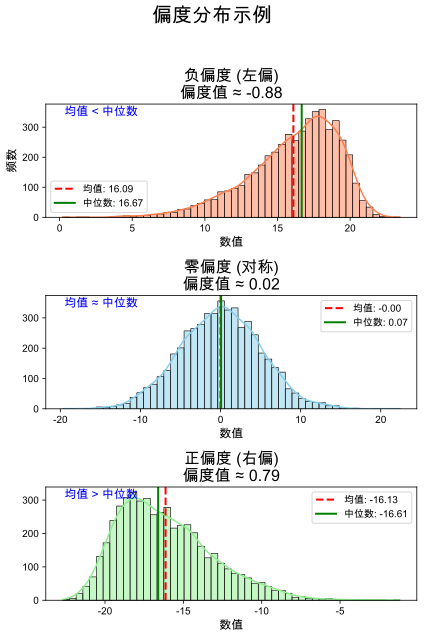

In [37]:
# 导入所需库
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm, skew
import seaborn as sns

# 设置中文字体，以正常显示图中的中文标签
# 请确保您的环境中已安装'PingFang SC'字体（macOS默认），否则可以替换为其他中文字体
try:
    plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS'] # macOS常用中文字体，并添加备用字体
    plt.rcParams['axes.unicode_minus'] = False # 解决负号'-'显示为方块的问题
except Exception as e:
    print(f"设置中文字体失败，请检查字体是否安装: {e}")
    # 如果没有'PingFang SC'字体，可以注释掉上面两行，或者更换为系统支持的其他中文字体

# --- 1. 生成不同偏度的数据 ---
np.random.seed(42) # 设置随机种子，保证每次运行结果一致
n_samples = 5000   # 样本数量

# 生成负偏度数据 (左偏)
# a < 0 会产生负偏度
data_neg = skewnorm.rvs(a=-5, loc=20, scale=5, size=n_samples)
skew_neg = skew(data_neg)

# 生成零偏度数据 (对称分布，接近正态分布)
# a = 0 时，skewnorm生成的就是正态分布
data_zero = skewnorm.rvs(a=0, loc=0, scale=5, size=n_samples)
skew_zero = skew(data_zero)

# 生成正偏度数据 (右偏)
# a > 0 会产生正偏度
data_pos = skewnorm.rvs(a=5, loc=-20, scale=5, size=n_samples)
skew_pos = skew(data_pos)

# --- 2. 可视化 ---
# 创建一个1行3列的图，用于并排展示三个分布
fig, axes = plt.subplots(3,1, figsize=(6, 9))
fig.suptitle('偏度分布示例', fontsize=20)


# (1) 绘制负偏度分布图
sns.histplot(data_neg, kde=True, ax=axes[0], color='coral', bins=50)
axes[0].set_title(f'负偏度 (左偏)\n偏度值 ≈ {skew_neg:.2f}', fontsize=16)
axes[0].set_xlabel('数值', fontsize=12)
axes[0].set_ylabel('频数', fontsize=12)
# 标出均值和中位数的位置，帮助理解偏度对它们的影响
mean_neg = np.mean(data_neg)
median_neg = np.median(data_neg)
axes[0].axvline(mean_neg, color='red', linestyle='--', linewidth=2, label=f'均值: {mean_neg:.2f}')
axes[0].axvline(median_neg, color='green', linestyle='-', linewidth=2, label=f'中位数: {median_neg:.2f}')
axes[0].legend()
axes[0].text(0.05, 0.9, '均值 < 中位数', transform=axes[0].transAxes, fontsize=12, color='blue')


# (2) 绘制零偏度分布图
sns.histplot(data_zero, kde=True, ax=axes[1], color='skyblue', bins=50)
axes[1].set_title(f'零偏度 (对称)\n偏度值 ≈ {skew_zero:.2f}', fontsize=16)
axes[1].set_xlabel('数值', fontsize=12)
axes[1].set_ylabel('') # 中间的图不显示y轴标签，避免拥挤
mean_zero = np.mean(data_zero)
median_zero = np.median(data_zero)
axes[1].axvline(mean_zero, color='red', linestyle='--', linewidth=2, label=f'均值: {mean_zero:.2f}')
axes[1].axvline(median_zero, color='green', linestyle='-', linewidth=2, label=f'中位数: {median_zero:.2f}')
axes[1].legend()
axes[1].text(0.05, 0.9, '均值 ≈ 中位数', transform=axes[1].transAxes, fontsize=12, color='blue')


# (3) 绘制正偏度分布图
sns.histplot(data_pos, kde=True, ax=axes[2], color='lightgreen', bins=50)
axes[2].set_title(f'正偏度 (右偏)\n偏度值 ≈ {skew_pos:.2f}', fontsize=16)
axes[2].set_xlabel('数值', fontsize=12)
axes[2].set_ylabel('')
mean_pos = np.mean(data_pos)
median_pos = np.median(data_pos)
axes[2].axvline(mean_pos, color='red', linestyle='--', linewidth=2, label=f'均值: {mean_pos:.2f}')
axes[2].axvline(median_pos, color='green', linestyle='-', linewidth=2, label=f'中位数: {median_pos:.2f}')
axes[2].legend()
axes[2].text(0.05, 0.9, '均值 > 中位数', transform=axes[2].transAxes, fontsize=12, color='blue')


# 调整布局并显示图像
plt.tight_layout(rect=[0, 0, 1, 0.95]) # 调整布局，为大标题留出空间
plt.show();

* 峰度（Kurtosis）表征概率密度分布曲线在平均值处峰度高低的特征。直观来看，峰度反应了峰部的尖度。其计算方法为
   $$K=\frac{1}{n} \sum_{i=1}^{n}\left[\left(\frac{X_{i}-\mu}{\sigma}\right)^{4}\right]$$
    其中 $\mu$ 是均值， $\sigma$ 是标准差。定义中包括正态分布（峰度=3），厚尾（峰度>3）,瘦尾（峰度<3）。

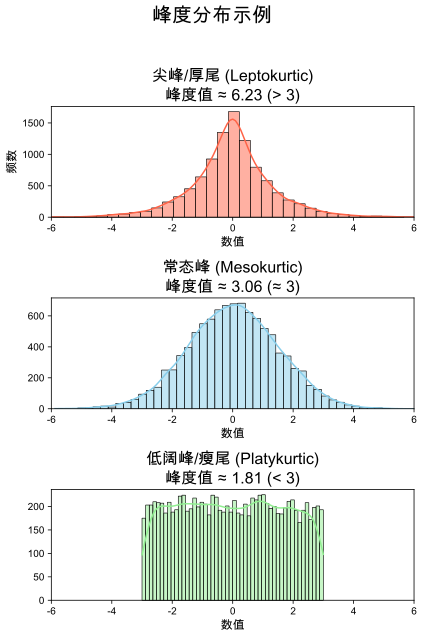

In [38]:
# 导入所需库
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, norm, laplace, uniform
import seaborn as sns

# 设置中文字体，以正常显示图中的中文标签
# 请确保您的环境中已安装'PingFang SC'字体（macOS默认），否则可以替换为其他中文字体
try:
    plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS'] # macOS常用中文字体，并添加备用字体
    plt.rcParams['axes.unicode_minus'] = False # 解决负号'-'显示为方块的问题
except Exception as e:
    print(f"设置中文字体失败，请检查字体是否安装: {e}")
    # 如果没有'PingFang SC'字体，可以注释掉上面两行，或者更换为系统支持的其他中文字体

# --- 1. 生成不同峰度的数据 ---
np.random.seed(42)
n_samples = 10000

# 生成尖峰/厚尾数据 (Leptokurtic)
# 拉普拉斯分布是典型的尖峰厚尾分布
data_lepto = laplace.rvs(loc=0, scale=1, size=n_samples)
# 使用 fisher=False 计算原始峰度值，此时正态分布的峰度为3
kurt_lepto = kurtosis(data_lepto, fisher=False)

# 生成常态峰数据 (Mesokurtic)
# 正态分布
data_meso = norm.rvs(loc=0, scale=1.5, size=n_samples) # 调整scale使视觉效果更清晰
kurt_meso = kurtosis(data_meso, fisher=False)

# 生成低阔峰/瘦尾数据 (Platykurtic)
# 均匀分布是典型的低阔峰
data_platy = uniform.rvs(loc=-3, scale=6, size=n_samples) # 范围从-3到3
kurt_platy = kurtosis(data_platy, fisher=False)

# --- 2. 可视化 ---
fig, axes = plt.subplots(3, 1, figsize=(6, 9))
fig.suptitle('峰度分布示例', fontsize=20)
common_xlim = (-6, 6) # 设置统一的x轴范围，便于比较

# (1) 绘制尖峰/厚尾分布
sns.histplot(data_lepto, kde=True, ax=axes[0], color='tomato', bins=50)
axes[0].set_title(f'尖峰/厚尾 (Leptokurtic)\n峰度值 ≈ {kurt_lepto:.2f} (> 3)', fontsize=16)
axes[0].set_xlabel('数值', fontsize=12)
axes[0].set_ylabel('频数', fontsize=12)
axes[0].set_xlim(common_xlim)

# (2) 绘制常态峰分布
sns.histplot(data_meso, kde=True, ax=axes[1], color='skyblue', bins=50)
axes[1].set_title(f'常态峰 (Mesokurtic)\n峰度值 ≈ {kurt_meso:.2f} (≈ 3)', fontsize=16)
axes[1].set_xlabel('数值', fontsize=12)
axes[1].set_ylabel('')
axes[1].set_xlim(common_xlim)

# (3) 绘制低阔峰/瘦尾分布
sns.histplot(data_platy, kde=True, ax=axes[2], color='lightgreen', bins=50)
axes[2].set_title(f'低阔峰/瘦尾 (Platykurtic)\n峰度值 ≈ {kurt_platy:.2f} (< 3)', fontsize=16)
axes[2].set_xlabel('数值', fontsize=12)
axes[2].set_ylabel('')
axes[2].set_xlim(common_xlim)

# 调整布局并显示图像
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show();

In [39]:
# Daily data
len(data_new['1995-01':'2025-08'])
data_new['1995-01':'2025-08']['Raw_return'].skew()
data_new['1995-01':'2025-08']['Raw_return'].kurt()
scipy.stats.kurtosis(data_new['1995-01':'2025-08']['Raw_return'],fisher=False) - 3
scipy.stats.kurtosis(data_new['1995-01':'2025-08']['Raw_return'],fisher=True)

7445

np.float64(0.6772796464034425)

np.float64(23.63802106137419)

np.float64(23.621343146464902)

np.float64(23.621343146464902)

In [40]:
m = np.mean(data_new['1995-01':'2024-09']['Raw_return'])
l = len(data_new['1995-01':'2024-09']['Raw_return'])
sum(((data_new['1995-01':'2024-09']['Raw_return'] - m)/np.std(data_new['1995-01':'2024-09']['Raw_return']))**4) / l -3

23.45514481569284

In [61]:
data_new['1995-01':'2025-08']['Raw_return'].skew()
data_new['1995-01':'2025-08']['Raw_return'].kurt()

np.float64(0.6772796464034425)

np.float64(23.63802106137419)

In [62]:
# Monthly data
Month_data['1995-01':'2025-08']['Ret'].skew()
Month_data['1995-01':'2025-08']['Ret'].kurt()

np.float64(0.3266812712820461)

np.float64(2.0120324549166306)

In [42]:
# Quarterly data
Quarter_data['1995-01':'2024-09']['Ret'].skew()
Quarter_data['1995-01':'2024-09']['Ret'].kurt()

np.float64(0.8675024485714982)

np.float64(1.7137615374448099)

# 标准正态分布的直方图

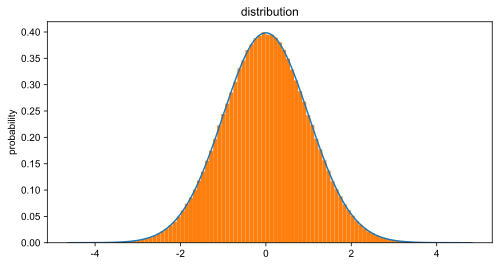

In [ ]:
# 根据均值、标准差,求指定范围的正态分布概率值

'''"
normfun(x, mu, sigma) 函数定义了一个正态分布的概率密度函数，
其中 x 是自变量
mu 是均值
sigma 是标准差
这个函数计算了在给定均值和标准差下 x 处的概率密度值。
'''

def normfun(x, mu, sigma):
  pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
  return pdf


# 生成高斯分布的概率密度随机数
result = np.random.normal(0, 1, 1000000) # mean 0 and standard deviation 1

# np.arange()
# 函数返回一个有终点和起点的固定步长的排列，如[1,2,3,4,5]，起点是1，终点是6，步长为1。
# 参数个数情况： np.arange()函数分为一个参数，两个参数，三个参数三种情况
# 1）一个参数时，参数值为终点，起点取默认值0，步长取默认值1。
# 2）两个参数时，第一个参数为起点，第二个参数为终点，步长取默认值1。
# 3）三个参数时，第一个参数为起点，第二个参数为终点，第三个参数为步长。其中步长支持小数

x = np.arange(min(result), max(result),0.01)

# 设定 y 轴，载入刚才的正态分布函数
y = normfun(x, result.mean(), result.std())

# 修改画图的大小
plt.figure(figsize=(8, 4)) # 设置图形大小为宽10英寸，高6英寸
plt.plot(x, y) # 这里画出理论的正态分布概率曲线
 
# 这里画出实际的参数概率与取值关系
fig = plt.hist(result, bins=100, rwidth=1, density=True) # bins=100 表示将数据分成100个柱状图，density=True 表示将频率转换为概率密度。宽度是rwidth(0~1),=1没有缝隙
plt.title('distribution')
#plt.xlabel('')
plt.ylabel('probability')
# 输出
plt.show(); # 最后图片的概率和不为1是因为正态分布是从负无穷到正无穷,这里指截取了数据最小值到最大值的分布

# 在日收益率直方图上添加正态分布密度曲线

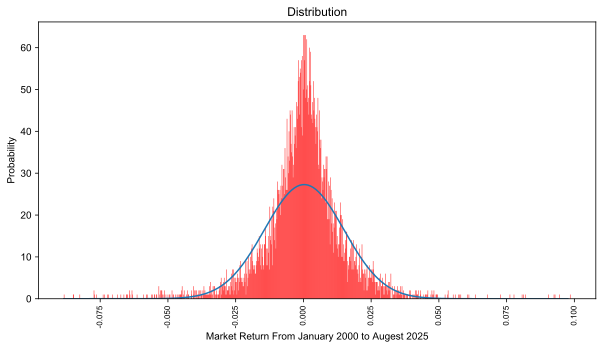

In [64]:
retmean = data_new['2000-01':'2025-08']['Raw_return'].mean()
retstd = data_new['2000-01':'2025-08']['Raw_return'].std()
retmin = data_new['2000-01':'2025-08']['Raw_return'].min()
retmax = data_new['2000-01':'2025-08']['Raw_return'].max()


def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2) /
                 (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf


x = np.arange(retmin, retmax, 0.001) # 0.001 0.002 0.003 0.004.。。。 0.099 0.100  0.101
y = normfun(x, retmean, retstd)
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y)

fig = plt.hist(data_new['2000-01':'2025-08']['Raw_return'], # index daily market excess return
               bins=1000,
               histtype='bar',
               color='r',
               alpha=0.9)
plt.xticks(rotation=90, fontsize=8) # x轴显示方法
plt.title('Distribution')
plt.xlabel('Market Return From January 2000 to Augest 2025')
plt.ylabel('Probability')
plt.show();

# 在月收益率直方图上添加正态分布密

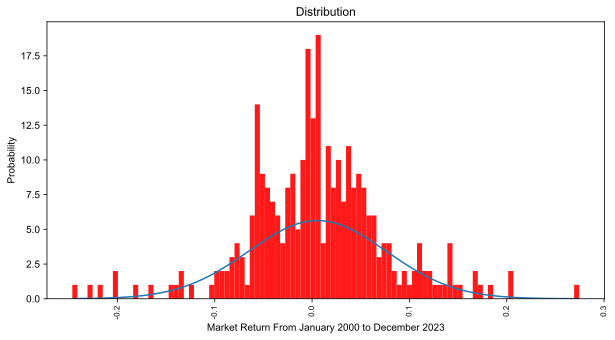

In [ ]:
retmean = Month_data['2000-01':'2025-08']['Ret'].mean()
retstd = Month_data['2000-01':'2025-08']['Ret'].std()
retmin = Month_data['2000-01':'2025-08']['Ret'].min()
retmax = Month_data['2000-01':'2025-08']['Ret'].max()


def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2) /
                 (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf


x = np.arange(retmin, retmax, 0.001)
y = normfun(x, retmean, retstd)
fig = plt.figure(figsize=(10, 5)) # 图片大小 10，5
plt.plot(x, y)

fig = plt.hist(Month_data['2000-01':'2025-08']['Ret'],
               bins=100,
               histtype='bar',
               color='r',
               alpha=0.9)
plt.xticks(rotation=90, fontsize=8)
plt.title('Distribution')
plt.xlabel('Market Return From January 2000 to December 2023')
plt.ylabel('Probability')
plt.show();

# 平稳性 stationary


### 什么是平稳性 (Stationarity)？

想象一下，你正在观察一条河流。如果你在任何一天、任何一周、任何一年去观察，发现这条河的水位总是在一个相似的高度上下波动，水流的速度也维持在一个稳定的范围内，那么我们可以说这条河的状貌是“平稳”的。

在时间序列分析中，“平稳性”就是类似的概念。一个时间序列如果具有平稳性，意味着它的统计特性不随时间的变化而变化。具体来说，我们通常关注的是**弱平稳性**（也叫协方差平稳性），它要求满足以下三个条件：

1.  **均值恒定**：序列的均值（期望值）是一个常数，不随时间t的变化而改变。就像那条河，无论你在1月份还是7月份测量，它的平均水位都是相似的。
2.  **方差恒定**：序列的方差是一个常数，不随时间t的变化而改变。这意味着序列的波动程度是稳定的。河水的波动幅度（浪花的大小）不会因为季节变化而发生系统性的剧烈改变。
3.  **协方差只与时间间隔有关**：序列在任意两个时间点（t和t-k）的协方差，只取决于它们之间的时间间隔k，而与具体的时间点t无关。也就是说，今天和昨天的关联程度，与去年今天和去年昨天的关联程度是一样的。

**一个非平稳的例子**：一支股票的价格。比如S&P 500指数，从1980年到今天，它的均值（平均价格水平）明显是不断上升的，这违背了“均值恒定”的原则，所以股价序列通常是非平稳的。

### 什么是遍历性 (Ergodicity)？

遍历性是一个更抽象，但同样重要的概念。它关系到我们如何利用有限的数据去推断总体的规律。

**一个经典的类比**：假设我们想知道一个赌场里所有**同款老虎机**的平均中奖概率。我们有两种方法：
1.  **空间平均 (Ensemble Average)**：在某个瞬间，把赌场里1000台老虎机全部玩一遍，然后计算这1000次结果的平均值。
2.  **时间平均 (Time Average)**：只选择**其中一台**老虎机，连续不断地玩1000次，然后计算这1000次结果的平均值。

如果这两种方法计算出的平均中奖概率是相等的，那么我们就说这个系统（所有老虎机的集合）具有**遍历性**。

在金融领域，我们面对的现实是：我们永远无法进行“空间平均”。我们观察不到S&P 500指数在“平行宇宙”中的其他可能路径。我们拥有的，仅仅是它从诞生至今的**一条**历史路径数据。遍历性假设允许我们相信，通过分析这一条足够长的时间序列（时间平均），我们就可以推断出这个指数背后数据生成过程的真实统计特性（空间平均）。

简单来说，**平稳性是遍历性的前提条件**。一个过程如果连自身的统计特性都在随时间变化（非平稳），那么我们观察的任何一段历史都不能代表它的“全部”，时间平均也就无从谈起了。

### 为什么平稳性在金融时间序列中如此重要？

平稳性是金融时间序列分析的基石，重要性体现在以下几个方面：

#### 1. 它是模型有效性的前提
许多经典的计量经济学模型，比如自回归模型（AR）、移动平均模型（MA）以及ARMA模型，都要求输入的数据是平稳的。这些模型的核心思想是，利用序列过去的行为和误差项来预测未来。如果序列的均值和方差等统计特性一直在变，那么基于历史数据估计出的模型参数就会不稳定，甚至毫无意义，无法用于未来的预测。

#### 2. 它是有效预测的基础
我们的目标是预测未来。如果一个时间序列是非平稳的，意味着它的行为模式在不断改变。比如一个公司的销售额，如果存在持续的增长趋势（均值不断变大），那么用过去十年的平均销售额来预测下个月的销售额，显然是荒谬的。只有当序列平稳时，我们才能假设“历史会在一定程度上重演”，过去的统计规律（如均值、波动性）在未来依然适用，从而让我们的预测有据可依。

#### 3. 它可以帮助我们避免“伪回归”（Spurious Regression）的陷阱
这是金融实证研究中最著名、也最危险的陷阱之一，也是对本科生最直观的警示。

**真实的金融事实说明**：
想象一下，你收集了两个毫不相关的时间序列数据：1990年到2020年“美国的名义GDP”和“马来西亚的棕榈油产量”。这两个序列很可能都是非平稳的，因为它们都随着经济发展和技术进步表现出明显的上升趋势。

如果你直接将这两个非平稳序列进行回归分析，比如 `GDP = a + b * PalmOil + e`，你很可能会得到一个**极其“漂亮”**的结果：
*   **很高的R²值**（比如0.9以上），显示模型解释力超强。
*   **非常显著的t统计量**，显示棕榈油产量对GDP有显著的解释能力。

看到这样的结果，你可能会兴奋地得出结论：“马来西亚的棕榈油产量是驱动美国GDP增长的关键因素！” 这显然是荒谬的。这种看似显著的统计关系其实是虚假的，它仅仅是因为两个序列共享了相似的时间趋势（都在增长），而并非存在任何真实的经济联系。这就是“伪回归”。

**如何解决？**
这个问题的根源在于序列的非平稳性。在金融实践中，我们通常不会直接对股价或GDP这样的水平值（Level）建模。我们会先对其进行**差分（Differencing）**处理，将其转换为平稳序列。

*   **股价 vs. 股票收益率**：股价（Price）是非平稳的，但它的对数差分，也就是我们常说的**对数收益率**（Log Return），通常是平稳的。股票收益率序列的均值会稳定地围绕一个小的正数波动，其方差也相对稳定。
*   **GDP vs. GDP增长率**：GDP总量是非平稳的，但GDP的同比增长率或环比增长率通常是平稳的。

通过对数据进行差分等变换，我们把非平稳的序列变成了平稳的序列。然后，我们再用平稳的收益率或增长率序列去构建模型和进行回归分析，这样得出的结论才是统计上可靠的，避免了伪回归的谬误。

**总结一下**：
你可以这样理解：平稳性就像是为我们的金融数据分析设定了“公平的赛道”。如果数据本身在随时间“变形”（非平稳），那么任何在历史赛道上总结出的规律都无法指导未来的比赛。我们必须通过差分等手段，将数据“拉直”到一条平稳的赛道上，然后才能运用各种强大的计量工具进行建模、预测和检验，得出有意义的结论。遍历性则为我们提供了理论上的信心，让我们相信在平稳的赛道上，跑得足够久，就能看清赛道本身的全貌。

In [ ]:
from statsmodels.tsa.stattools import adfuller as ADF

# 对月收益率数据进行ADF检验
adf_result = ADF(Month_data['2000-01':'2024-09']['Ret'])

print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')

if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')

原始序列的ADF检验结果:
ADF Statistic: -6.0735
p-value: 0.0000
Critical Values:
   1%: -3.4537
   5%: -2.8718
   10%: -2.5722
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


In [66]:
from statsmodels.tsa.stattools import adfuller as ADF
adf_result = ADF(Quarter_data['2000':'2025']['Ret'])

print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')   
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')
if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')


原始序列的ADF检验结果:
ADF Statistic: -5.6533
p-value: 0.0000
Critical Values:
   1%: -3.4989
   5%: -2.8915
   10%: -2.5828
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


In [67]:
adf_result = ADF(data_new['2000-01':'2025-08']['Raw_return'])
print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')   
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')
if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')

原始序列的ADF检验结果:
ADF Statistic: -12.4417
p-value: 0.0000
Critical Values:
   1%: -3.4314
   5%: -2.8620
   10%: -2.5670
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


In [70]:
data

,Preclose,Open,Highest,Lowest,Close
Day,,,,,
1990-12-19,,96.050,99.980,95.790,99.980
1990-12-20,99.98,104.300,104.390,99.980,104.390
1990-12-21,104.39,109.070,109.130,103.730,109.130
1990-12-24,109.13,113.570,114.550,109.130,114.550
1990-12-25,114.55,120.090,120.250,114.550,120.250
...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350


In [71]:
adf_result = ADF(data['2000':'2025']['Close'])
print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')   
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}') 
if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')

原始序列的ADF检验结果:
ADF Statistic: -2.2358
p-value: 0.1935
Critical Values:
   1%: -3.4314
   5%: -2.8620
   10%: -2.5670
结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。
